In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pd_p
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing as pre
from sklearn.pipeline import Pipeline as pipe
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import random
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('OJ.csv')
data = data.drop(columns='Id')
data['Purchase'] = data['Purchase'].replace(['CH','MM'],[1,0])
data['Store7'] = data['Store7'].replace(['Yes','No'],[1,0])
data = data.drop('STORE',axis = 1)
data_dummy = pd.get_dummies(data)

In [3]:
def setup(data, target, split=0.7):
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import LogisticRegression
  X = data.drop(target,axis=1)
  y = data[target]
  global X_train, X_test, y_train, y_test, simple_logistic_model
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
  simple_logistic_model = LogisticRegression(solver='lbfgs', max_iter=10000)

In [5]:
def base_model(data_X=X_train, data_y=y_train, model=simple_logistic_model, fold=10, plot=False, round=4, ensemble=False, 
               method='Bagging'):
  
  from sklearn.model_selection import StratifiedKFold
  import numpy as np
  import pandas as pd
  import pandas_profiling as pd_p
  import seaborn as sns
  from sklearn import preprocessing as pre
  from sklearn.pipeline import Pipeline as pipe
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import RidgeClassifier
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import LogisticRegression
  from sklearn.linear_model import SGDClassifier
  from sklearn import metrics
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from scipy import stats
  import random
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_val_predict
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import cohen_kappa_score
  from sklearn.ensemble import BaggingClassifier
    
  kf = StratifiedKFold(fold)

  score_auc =np.empty((0,0))
  score_acc =np.empty((0,0))
  score_recall =np.empty((0,0))
  score_precision =np.empty((0,0))
  score_f1 =np.empty((0,0))
  score_kappa =np.empty((0,0))
  avgs_auc =np.empty((0,0))
  avgs_acc =np.empty((0,0))
  avgs_recall =np.empty((0,0))
  avgs_precision =np.empty((0,0))
  avgs_f1 =np.empty((0,0))
  avgs_kappa =np.empty((0,0))
  
  if ensemble and method == 'Bagging':
    model = BaggingClassifier(LogisticRegression(solver='lbfgs', max_iter=10000),bootstrap=True,n_estimators=10)
  elif ensemble and method == 'Boosting':
    model = AdaBoostClassifier(LogisticRegression(solver='lbfgs', max_iter=10000))
  else:
    model = LogisticRegression(solver='lbfgs', max_iter=10000)
    
  for train_i , test_i in kf.split(data_X,data_y):
  #print("TRAIN:", train_i, "TEST:", test_i)
    
    Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
    ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]
  
    model.fit(Xtrain,ytrain)
    pred_prob = model.predict_proba(Xtest)
    pred_prob = pred_prob[:,1]
    pred_ = model.predict(Xtest)
    sca = metrics.accuracy_score(ytest,pred_)
    sc = metrics.roc_auc_score(ytest,pred_prob)
    recall = metrics.recall_score(ytest,pred_)
    precision = metrics.average_precision_score(ytest,pred_prob)
    kappa = cohen_kappa_score(ytest,pred_)
    f1 = metrics.f1_score(ytest,pred_)
    score_acc = np.append(score_acc,sca)
    score_auc = np.append(score_auc,sc)
    score_recall = np.append(score_recall,recall)
    score_precision = np.append(score_precision,precision)
    score_f1 =np.append(score_f1,f1)
    score_kappa =np.append(score_kappa,kappa)
     
  mean_acc=np.mean(score_acc)
  mean_auc=np.mean(score_auc)
  mean_recall=np.mean(score_recall)
  mean_precision=np.mean(score_precision)
  mean_f1=np.mean(score_f1)
  mean_kappa=np.mean(score_kappa)
  std_acc=np.std(score_acc)
  std_auc=np.std(score_auc)
  std_recall=np.std(score_recall)
  std_precision=np.std(score_precision)
  std_f1=np.std(score_f1)
  std_kappa=np.std(score_kappa)
    
  avgs_acc = np.append(avgs_acc, mean_acc)
  avgs_acc = np.append(avgs_acc, std_acc) 
  avgs_auc = np.append(avgs_auc, mean_auc)
  avgs_auc = np.append(avgs_auc, std_auc)
  avgs_recall = np.append(avgs_recall, mean_recall)
  avgs_recall = np.append(avgs_recall, std_recall)
  avgs_precision = np.append(avgs_precision, mean_precision)
  avgs_precision = np.append(avgs_precision, std_precision)
  avgs_f1 = np.append(avgs_f1, mean_f1)
  avgs_f1 = np.append(avgs_f1, std_f1)
  avgs_kappa = np.append(avgs_kappa, mean_kappa)
  avgs_kappa = np.append(avgs_kappa, std_kappa)
  
  global base_model_, base_model_unpivot_
      
  base_model_ = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Precision' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
  base_model_unpivot_ = pd.melt(base_model_,value_vars=['Accuracy', 'AUC', 'Recall', 'Precision', 'F1', 'Kappa'])
  base_model_unpivot_.columns = ['Metric', 'Measure']
  base_model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Precision' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])
  
  base_model_ = base_model_.append(base_model_avgs)
  base_model_ = base_model_.round(round)  

  if plot:
    from IPython.display import display, HTML
    display(HTML(base_model_.to_html()))
    #return(base_model_)
    #display(base_model_)
    #return(base_model_unpivot_)
    sns.set(rc={'figure.figsize':(8.7,5.27)})
    sns.boxplot(x='Metric', y='Measure', data=base_model_unpivot_, width=0.5, linewidth=1, palette='Set2').set_title('Results from K-Fold Cross Validation')
  else:
    return(base_model_)
 

In [6]:
#compare_models() function

def compare_models(data_X=X_train, data_y=y_train, fold=10, round=4, sort='Accuracy', plot=False):

  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.svm import SVC
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn import preprocessing as pre
  from sklearn.pipeline import Pipeline as pipe
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import RidgeClassifier
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import LogisticRegression
  from sklearn.linear_model import SGDClassifier
  from sklearn import metrics
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from scipy import stats
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_val_predict
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import cohen_kappa_score
  import numpy as np
  import pandas as pd
  import pandas_profiling as pd_p
  import seaborn as sns
  import random
  import pandas.io.formats.style

  lr = LogisticRegression(solver='lbfgs',max_iter=10000)
  knn = KNeighborsClassifier()
  nb = GaussianNB()
  dt = DecisionTreeClassifier()
  svm = SVC(probability=True,kernel='linear')
  rbfsvm = SVC(gamma='auto', C=1, probability=True, kernel='rbf')
  gpc = GaussianProcessClassifier()
  mlp = MLPClassifier(max_iter=500)

  model_library = list([lr, knn, nb, dt, svm, rbfsvm, gpc, mlp])

  kf = StratifiedKFold(fold)

  score_acc =np.empty((0,0))
  score_auc =np.empty((0,0))
  score_recall =np.empty((0,0))
  score_precision =np.empty((0,0))
  score_f1 =np.empty((0,0))
  score_kappa =np.empty((0,0))
  global score_acc_running
  score_acc_running = np.empty((0,0)) ##running total
  avg_acc = np.empty((0,0))
  avg_auc = np.empty((0,0))
  avg_recall = np.empty((0,0))
  avg_precision = np.empty((0,0))
  avg_f1 = np.empty((0,0))
  avg_kappa = np.empty((0,0))
      
  for model in model_library:
    
    for train_i , test_i in kf.split(data_X,data_y):
     
        Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
        ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]
        model.fit(Xtrain,ytrain)
        pred_prob = model.predict_proba(Xtest)
        pred_prob = pred_prob[:,1]
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = metrics.roc_auc_score(ytest,pred_prob)
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.average_precision_score(ytest,pred_prob)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
        score_acc_running = np.append(score_acc_running,sca)
    avg_acc = np.append(avg_acc,np.mean(score_acc))
    avg_auc = np.append(avg_auc,np.mean(score_auc))
    avg_recall = np.append(avg_recall,np.mean(score_recall))
    avg_precision = np.append(avg_precision,np.mean(score_precision))
    avg_f1 = np.append(avg_f1,np.mean(score_f1))
    avg_kappa = np.append(avg_kappa,np.mean(score_kappa))
    score_acc =np.empty((0,0))
    score_auc =np.empty((0,0))
    score_recall =np.empty((0,0))
    score_precision =np.empty((0,0))
    score_f1 =np.empty((0,0))
    score_kappa =np.empty((0,0))
  
  model_list = ['Logistic Regression', 'K Nearest Neighbours', 'Gaussian Naive Bayes',
                           'Decision Tree', 'Support Vector Machine - Linear', 'Support Vector Machine - RBF',
                           'Gaussian Process Classifier', 'Neural Net - Multi Level Perceptron']
  
  model_list_short = ['LR', 'KNN', 'NB', 'DT', 'SVM-L', 'SVM-RBF','GPC', 'NN-MLP']    
  model_list_repeat = np.repeat(model_list_short, fold)

  compare_models_unpivot = pd.DataFrame({'Model': model_list_repeat, 'Accuracy':score_acc_running}) #accuracy hardcoded
  
  global compare_models_
  
  def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

  compare_models_ = pd.DataFrame({'Model':model_list, 'Accuracy':avg_acc, 'AUC':avg_auc, 
                     'Recall':avg_recall, 'Precision':avg_precision, 
                     'F1':avg_f1, 'Kappa': avg_kappa}).round(round).sort_values(by=[sort], 
                      ascending=False).reset_index(drop=True).style.apply(highlight_max,subset=['Accuracy','AUC','Recall',
                      'Precision','F1','Kappa'])
  compare_models_ = compare_models_.set_properties(**{'text-align': 'left'})
  compare_models_ = compare_models_.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
                  
  if plot:
    display(compare_models_)
    sns.set(rc={'figure.figsize':(8.7,5.27)})
    sns.boxplot(x='Model', y='Accuracy', data=compare_models_unpivot, width=0.5, linewidth=1, palette='Set2').set_title('Models Accuracy Comparison on Cross Validation') 
    #accuracy hardcdoded
  else:  
    return compare_models_

In [7]:
def tune_model():
    pass

In [8]:
def blend_models(data_X=X_train, data_y=y_train, fold=10, round=4, sort='Accuracy'):
  
  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.svm import SVC
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.model_selection import StratifiedKFold
  import numpy as np
  import pandas as pd
  import pandas_profiling as pd_p
  import seaborn as sns
  from sklearn import preprocessing as pre
  from sklearn.pipeline import Pipeline as pipe
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import RidgeClassifier
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import LogisticRegression
  from sklearn.linear_model import SGDClassifier
  from sklearn import metrics
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from scipy import stats
  import random
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_val_predict
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import cohen_kappa_score
  from sklearn.ensemble import BaggingClassifier
  from sklearn.ensemble import VotingClassifier

  kf = StratifiedKFold(fold)

  score_auc =np.empty((0,0))
  score_acc =np.empty((0,0))
  score_recall =np.empty((0,0))
  score_precision =np.empty((0,0))
  score_f1 =np.empty((0,0))
  score_kappa =np.empty((0,0))
  #avgs_auc =np.empty((0,0))
  #avgs_acc =np.empty((0,0))
  #avgs_recall =np.empty((0,0))
  #avgs_precision =np.empty((0,0))
  #avgs_f1 =np.empty((0,0))
  #avgs_kappa =np.empty((0,0))
  avg_acc = np.empty((0,0))
  avg_auc = np.empty((0,0))
  avg_recall = np.empty((0,0))
  avg_precision = np.empty((0,0))
  avg_f1 = np.empty((0,0))
  avg_kappa = np.empty((0,0))
  
  lr = LogisticRegression(solver='lbfgs',max_iter=10000)
  knn = KNeighborsClassifier()
  nb = GaussianNB()
  dt = DecisionTreeClassifier()
  svm = SVC(probability=True,kernel='linear')
  rbfsvm = SVC(gamma='auto', C=1, probability=True, kernel='rbf')
  gpc = GaussianProcessClassifier()
  mlp = MLPClassifier(max_iter=500)
  
  #comb = [('lr',lr),('knn', knn),('nb', nb)]
  comb = [[('lr',lr),('knn', knn),('nb', nb), ('dt', dt), ('svm', svm), ('rbfsvm', rbfsvm), ('gpc', gpc)],
          [('lr',lr),('knn', knn),('nb', nb), ('dt', dt), ('svm', svm), ('rbfsvm', rbfsvm), ('mlp', mlp)],
          [('lr',lr),('knn', knn),('nb', nb), ('dt', dt), ('svm', svm), ('gpc', gpc), ('mlp', mlp)],
          [('lr',lr),('knn', knn),('nb', nb), ('dt', dt), ('rbfsvm', rbfsvm), ('gpc', gpc), ('mlp', mlp)],
          [('lr',lr),('knn', knn),('nb', nb), ('svm', svm), ('rbfsvm', rbfsvm), ('gpc', gpc), ('mlp', mlp)],
          [('lr',lr),('knn', knn),('dt', dt), ('svm', svm), ('rbfsvm', rbfsvm), ('gpc', gpc), ('mlp', mlp)],
          [('lr',lr),('nb', nb),('dt', dt), ('svm', svm), ('rbfsvm', rbfsvm), ('gpc', gpc), ('mlp', mlp)],
          [('knn',knn),('nb', nb),('dt', dt), ('svm', svm), ('rbfsvm', rbfsvm), ('gpc', gpc), ('mlp', mlp)]]
    
  for i in comb:
    model = VotingClassifier(estimators=i, voting='soft', n_jobs=-1)
  
    for train_i , test_i in kf.split(data_X,data_y):
        
        Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
        ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]
        model.fit(Xtrain,ytrain)
        pred_prob = model.predict_proba(Xtest)
        pred_prob = pred_prob[:,1]
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = metrics.roc_auc_score(ytest,pred_prob)
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.average_precision_score(ytest,pred_prob)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
        #score_acc_running = np.append(score_acc_running,sca)
    avg_acc = np.append(avg_acc,np.mean(score_acc))
    avg_auc = np.append(avg_auc,np.mean(score_auc))
    avg_recall = np.append(avg_recall,np.mean(score_recall))
    avg_precision = np.append(avg_precision,np.mean(score_precision))
    avg_f1 = np.append(avg_f1,np.mean(score_f1))
    avg_kappa = np.append(avg_kappa,np.mean(score_kappa))
    score_acc =np.empty((0,0))
    score_auc =np.empty((0,0))
    score_recall =np.empty((0,0))
    score_precision =np.empty((0,0))
    score_f1 =np.empty((0,0))
    score_kappa =np.empty((0,0))
  
  model_list = ['LR + KNN + NB + DT + SVM + SVM-RBF + GPC', 
                'LR + KNN + NB + DT + SVM + SVM-RBF + MLP', 
                'LR + KNN + NB + DT + SVM + GPC + MLP',
                'LR + KNN + NB + DT + SVM-RBF + GPC + MLP',
                'LR + KNN + NB + SVM + SVM-RBF + GPC + MLP',
                'LR + KNN + DT + SVM + SVM-RBF + GPC + MLP',                
                'LR + NB + DT + SVM + SVM-RBF + GPC + MLP',                
                'KNN + NB + DT + SVM + SVM-RBF + GPC + MLP']
                      
  #model_list_short = ['LR', 'KNN', 'NB', 'DT', 'SVM-L', 'SVM-RBF','GPC', 'NN-MLP']    
  #model_list_repeat = np.repeat(model_list_short, fold)

  #compare_models_unpivot = pd.DataFrame({'Model': model_list_repeat, 'Accuracy':score_acc_running}) #accuracy hardcoded
  
  global blend_models_
  
  def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

  blend_models_ = pd.DataFrame({'Model':model_list, 'Accuracy':avg_acc, 'AUC':avg_auc, 'Recall':avg_recall, 'Precision':avg_precision, 'F1':avg_f1, 'Kappa': avg_kappa}).round(round).sort_values(by=[sort], ascending=False).reset_index(drop=True).style.apply(highlight_max,subset=['Accuracy','AUC','Recall','Precision','F1','Kappa'])
  blend_models_ = blend_models_.set_properties(**{'text-align': 'left'})
  blend_models_ = blend_models_.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

  display(blend_models_)
    #sns.set(rc={'figure.figsize':(8.7,5.27)})
    #sns.boxplot(x='Model', y='Accuracy', data=compare_models_unpivot, width=0.5, linewidth=1, palette='Set2').set_title('Models Accuracy Comparison on Cross Validation') 
    #accuracy hardcdoded


# Execution Starts Here

In [4]:
setup(data_dummy,'Purchase')

In [9]:
base_model()

,Accuracy,AUC,Recall,Precision,F1,Kappa
0,0.8421,0.8774,0.8889,0.8939,0.8696,0.6698
1,0.8158,0.8659,0.8222,0.8859,0.8409,0.6224
2,0.8421,0.9151,0.8667,0.9474,0.8667,0.6731
3,0.8133,0.9281,0.8667,0.9528,0.8478,0.6067
4,0.7867,0.8915,0.8889,0.9285,0.8333,0.5402
5,0.8000,0.8600,0.8444,0.9148,0.8352,0.5810
6,0.7568,0.8542,0.8409,0.8899,0.8043,0.4845
7,0.8919,0.9667,0.8864,0.9795,0.9070,0.7781
8,0.8108,0.9167,0.8636,0.9377,0.8444,0.6034
9,0.7973,0.8629,0.8182,0.9120,0.8276,0.5818


,Accuracy,AUC,Recall,Precision,F1,Kappa
0,0.8421,0.8774,0.8889,0.8939,0.8696,0.6698
1,0.8158,0.8659,0.8222,0.8859,0.8409,0.6224
2,0.8421,0.9151,0.8667,0.9474,0.8667,0.6731
3,0.8133,0.9281,0.8667,0.9528,0.8478,0.6067
4,0.7867,0.8915,0.8889,0.9285,0.8333,0.5402
5,0.8000,0.8600,0.8444,0.9148,0.8352,0.5810
6,0.7568,0.8542,0.8409,0.8899,0.8043,0.4845
7,0.8919,0.9667,0.8864,0.9795,0.9070,0.7781
8,0.8108,0.9167,0.8636,0.9377,0.8444,0.6034
9,0.7973,0.8629,0.8182,0.9120,0.8276,0.5818


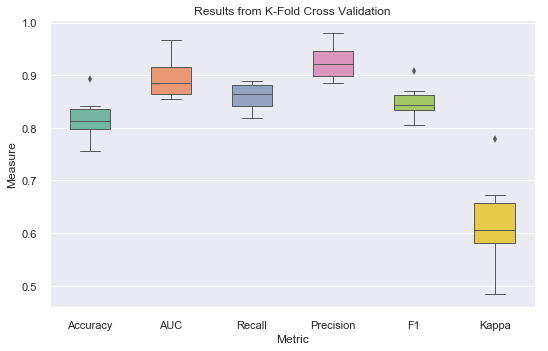

In [10]:
base_model(plot=True)

In [11]:
base_model(ensemble=True, method = 'Bagging')

,Accuracy,AUC,Recall,Precision,F1,Kappa
0,0.8553,0.8789,0.9111,0.8940,0.8817,0.6958
1,0.8158,0.8609,0.8222,0.8809,0.8409,0.6224
2,0.8421,0.9151,0.8667,0.9481,0.8667,0.6731
3,0.8133,0.9296,0.8889,0.9537,0.8511,0.6023
4,0.7867,0.8922,0.8889,0.9275,0.8333,0.5402
5,0.8133,0.8615,0.8667,0.9167,0.8478,0.6067
6,0.7703,0.8549,0.8636,0.8896,0.8172,0.5105
7,0.8919,0.9712,0.8864,0.9821,0.9070,0.7781
8,0.8108,0.9182,0.8636,0.9405,0.8444,0.6034
9,0.7703,0.8667,0.8182,0.9180,0.8090,0.5209


In [12]:
base_model(ensemble=True, method ='Boosting')

,Accuracy,AUC,Recall,Precision,F1,Kappa
0,0.8289,0.8817,0.8667,0.9007,0.8571,0.6441
1,0.7895,0.8581,0.8444,0.8735,0.8261,0.5597
2,0.8289,0.9251,0.8667,0.9514,0.8571,0.6441
3,0.8000,0.9170,0.8889,0.9431,0.8421,0.5714
4,0.7733,0.8878,0.9111,0.9292,0.8283,0.5029
5,0.8133,0.8533,0.8667,0.8943,0.8478,0.6067
6,0.7703,0.8496,0.8636,0.8895,0.8172,0.5105
7,0.8784,0.9364,0.8864,0.9608,0.8966,0.7491
8,0.8378,0.9098,0.9318,0.9332,0.8723,0.6526
9,0.7432,0.8432,0.8182,0.8898,0.7912,0.4588


In [13]:
compare_models()

,Model,Accuracy,AUC,Recall,Precision,F1,Kappa
0,Logistic Regression,0.8157,0.8938,0.8587,0.9242,0.8477,0.6141
1,Support Vector Machine - Linear,0.8143,0.8928,0.8564,0.9245,0.8464,0.6115
2,Neural Net - Multi Level Perceptron,0.7762,0.8809,0.8963,0.9171,0.8279,0.5092
3,Decision Tree,0.7599,0.7516,0.7938,0.7602,0.7957,0.5038
4,Gaussian Naive Bayes,0.7516,0.829,0.7356,0.8657,0.7792,0.4973
5,Gaussian Process Classifier,0.7489,0.7937,0.8409,0.8477,0.7999,0.4648
6,K Nearest Neighbours,0.7302,0.7738,0.8026,0.7998,0.78,0.4315
7,Support Vector Machine - RBF,0.7045,0.8089,0.8158,0.8663,0.7658,0.368


,Model,Accuracy,AUC,Recall,Precision,F1,Kappa
0,Logistic Regression,0.8157,0.8938,0.8587,0.9242,0.8477,0.6141
1,Support Vector Machine - Linear,0.8143,0.8929,0.8564,0.9245,0.8464,0.6115
2,Neural Net - Multi Level Perceptron,0.7891,0.883,0.8566,0.9154,0.8288,0.5513
3,Gaussian Naive Bayes,0.7516,0.829,0.7356,0.8657,0.7792,0.4973
4,Gaussian Process Classifier,0.7489,0.7937,0.8409,0.8477,0.7999,0.4648
5,Decision Tree,0.7452,0.7345,0.7894,0.7461,0.7853,0.4711
6,K Nearest Neighbours,0.7302,0.7738,0.8026,0.7998,0.78,0.4315
7,Support Vector Machine - RBF,0.7045,0.8089,0.8158,0.8664,0.7658,0.368


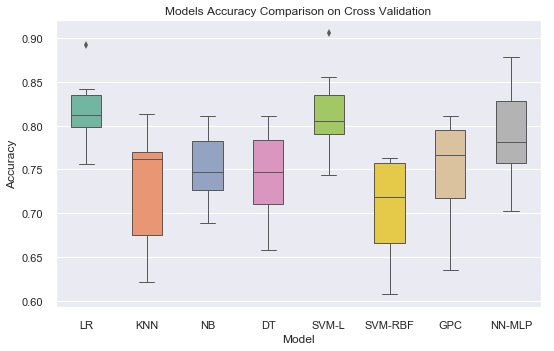

In [14]:
compare_models(plot=True)

In [15]:
blend_models()

,Model,Accuracy,AUC,Recall,Precision,F1,Kappa
0,LR + KNN + DT + SVM + SVM-RBF + GPC + MLP,0.8037,0.8806,0.8632,0.9097,0.8398,0.5867
1,LR + KNN + NB + DT + SVM + SVM-RBF + MLP,0.8025,0.8812,0.8498,0.9113,0.837,0.5861
2,LR + KNN + NB + DT + SVM + GPC + MLP,0.8012,0.8815,0.8432,0.9103,0.8349,0.5849
3,LR + NB + DT + SVM + SVM-RBF + GPC + MLP,0.7985,0.8776,0.8342,0.9107,0.8315,0.5805
4,LR + KNN + NB + SVM + SVM-RBF + GPC + MLP,0.7984,0.8781,0.8454,0.9086,0.8337,0.5777
5,LR + KNN + NB + DT + SVM-RBF + GPC + MLP,0.7851,0.8723,0.8207,0.9038,0.8197,0.5533
6,KNN + NB + DT + SVM + SVM-RBF + GPC + MLP,0.7851,0.8732,0.8298,0.904,0.8213,0.5515
7,LR + KNN + NB + DT + SVM + SVM-RBF + GPC,0.7824,0.8771,0.823,0.9084,0.8184,0.5467
